In [1]:
import pandas as pd
import glob

# List of CSV files
csv_files = [
    'AUBANK.NS_data.csv',
    'AXISBANK.NS_data.csv',
    'BANDHANBNK.NS_data.csv',
    'BANKBARODA.NS_data.csv',
    'FEDERALBNK.NS_data.csv',
    'HDFCBANK.NS_data.csv',
    'ICICIBANK.NS_data.csv',
    'IDFCFIRSTB.NS_data.csv',
    'INDUSINDBK.NS_data.csv',
    'KOTAKBANK.NS_data.csv',
    'NSEBANK_data.csv',
    'PNB.NS_data.csv',
    'SBIN.NS_data.csv'
]

# Combine all CSV files into a single DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-07-11 00:00:00+05:30,267.758159,286.531159,265.464526,282.841370,28572624,0.0,0.0
1,2017-07-12 00:00:00+05:30,287.428671,320.462150,286.705668,313.905304,35549156,0.0,0.0
2,2017-07-13 00:00:00+05:30,325.099310,348.509458,314.179551,344.620239,43750394,0.0,0.0
3,2017-07-14 00:00:00+05:30,347.936021,361.747761,279.774859,298.572784,67296768,0.0,0.0
4,2017-07-17 00:00:00+05:30,294.184971,306.002238,280.398154,297.226532,23021580,0.0,0.0


               Open          High           Low         Close        Volume  \
count  31141.000000  31141.000000  31141.000000  31141.000000  3.114100e+04   
mean    2209.818564   2229.105783   2187.611251   2208.525502  1.279230e+07   
std     6649.401309   6699.005450   6591.074452   6645.975592  2.083833e+07   
min       18.500000     19.299999     17.650000     18.150000  0.000000e+00   
25%      133.915947    135.765122    131.600006    133.661377  2.084251e+06   
50%      306.786320    311.228078    301.951306    306.710480  6.714690e+06   
75%      741.798487    749.059829    733.683211    741.371521  1.586670e+07   
max    44078.089501  44151.287869  43987.438210  44048.589844  5.118155e+08   

          Dividends  Stock Splits  
count  31141.000000  31141.000000  
mean       0.008906      0.001416  
std        0.210018      0.088182  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


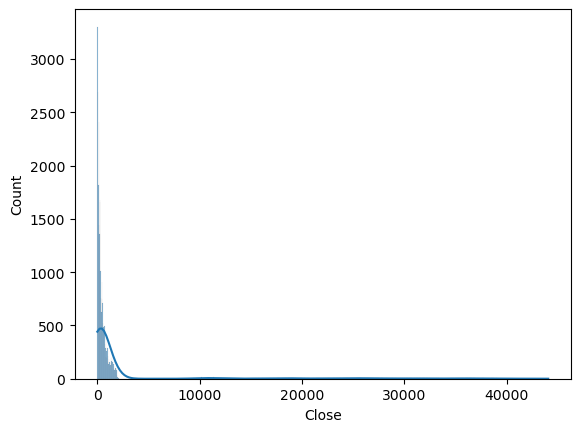

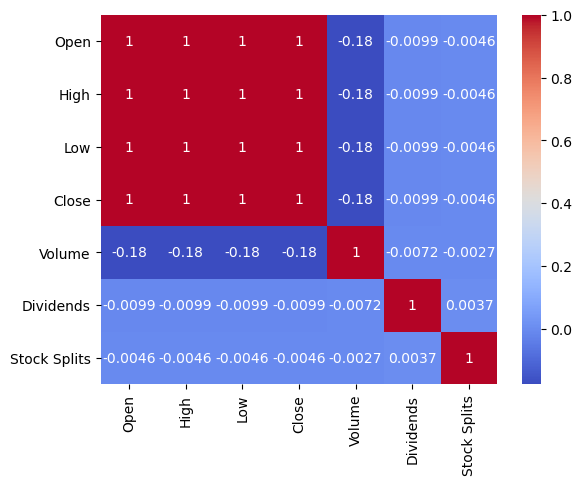

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(combined_df.describe())

# Check for missing values
print(combined_df.isnull().sum())

# Visualize the distribution of a key variable (e.g., 'Close' price)
sns.histplot(combined_df['Close'], kde=True)
plt.show()

# Correlation matrix (excluding 'Date' column)
corr_matrix = combined_df.drop(columns=['Date']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values (if any)
combined_df = combined_df.dropna()

# Feature selection (e.g., using 'Close' price as the target variable and excluding 'Date' column)
features = combined_df.drop(['Close', 'Date'], axis=1)
target = combined_df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize/scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Example: Create new features based on the existing columns (e.g., moving averages)
combined_df['MA50'] = combined_df['Close'].rolling(window=50).mean()
combined_df['MA200'] = combined_df['Close'].rolling(window=200).mean()


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2775.9457809322657
R^2 Score: 0.9999390172248235


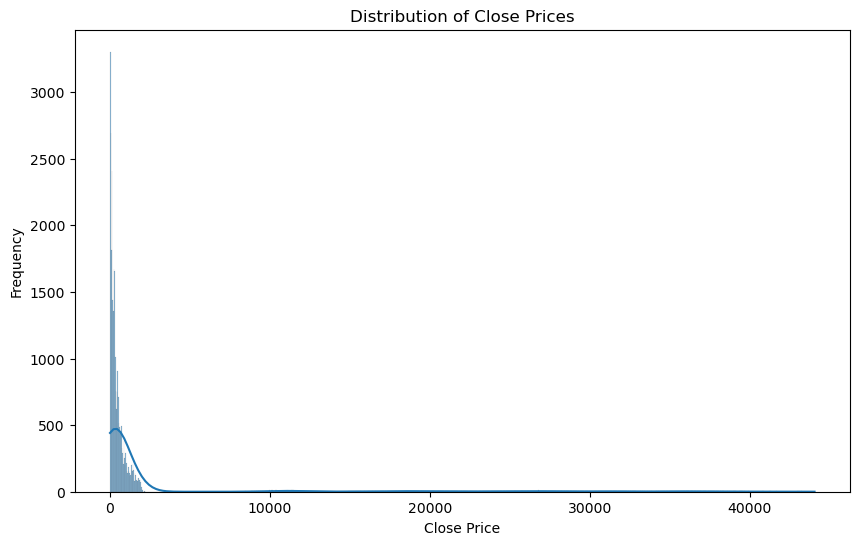

In [7]:
# Histogram of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

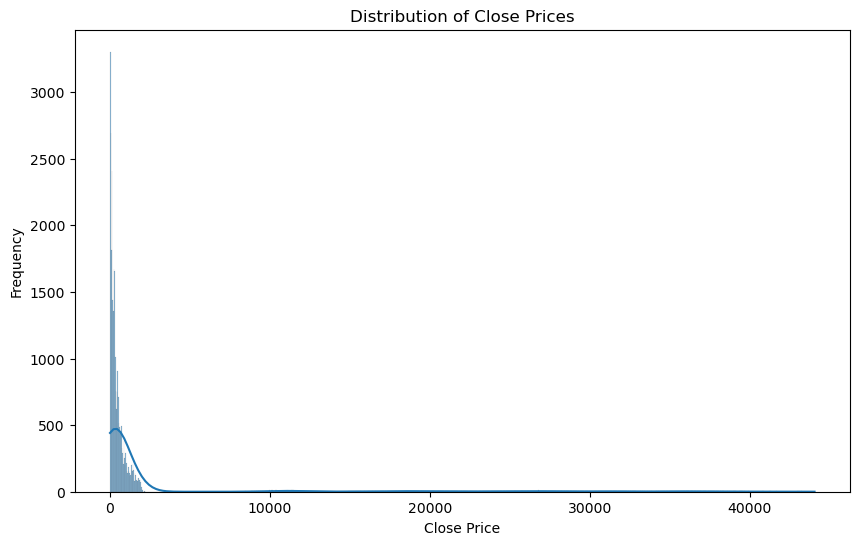

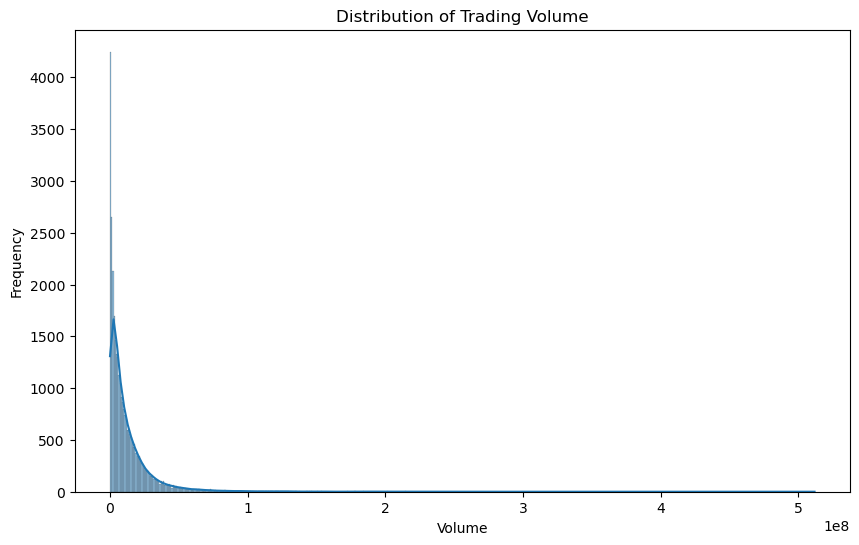

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'Volume'
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Volume'], kde=True)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()
